In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df_id = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/identity/pbmc_new_cytokine/metrics_new_cytokine.csv", index_col=0)
df_mean_1 = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/additive_model/pbmc_new_cytokine/mean_model_same_donor/metrics_new_cytokine.csv", index_col=0)
df_mean_2 = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/additive_model/pbmc_new_cytokine/mean_model_same_cytokine/metrics_new_cytokine.csv", index_col=0)
df_cf = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics/metrics_new_cytokine.csv")

In [4]:
dfs_id = []
for n in df_cf["num_donors_in_train"].unique():
    df_tmp = df_id.copy()
    df_tmp["num_donors_in_train"] = n
    dfs_id.append(df_tmp)

In [5]:
df_id_final = pd.concat(dfs_id)

In [6]:
df_cf["num_donors_in_train"].value_counts()

num_donors_in_train
1.0     396
2.0     360
3.0     324
4.0     288
5.0     252
6.0     216
7.0     180
11.0    144
0.0     144
8.0     144
9.0     108
10.0     72
Name: count, dtype: int64

In [7]:
df_mean_1["num_donors_in_train"] =df_mean_1["split-idx"]

In [8]:
df_mean_2["num_donors_in_train"] =df_mean_2["split-idx"]

In [9]:
df_mean_1["num_donors_in_train"].value_counts()

num_donors_in_train
1     396
2     360
3     324
4     288
5     252
6     216
7     180
11    144
8     144
0     144
9     108
10     72
Name: count, dtype: int64

In [10]:
df_mean_2["num_donors_in_train"].value_counts() 

num_donors_in_train
1     396
2     360
3     324
4     288
5     252
6     216
7     180
11    144
8     144
9     108
10     72
Name: count, dtype: int64

In [11]:
df_id_final["method"] = "id"
df_cf["method"] = "cf"
df_mean_1["method"] = "m1"
df_mean_2["method"] = "m2"
df = pd.concat((df_cf, df_id_final, df_mean_1, df_mean_2))

In [13]:
df.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_new_cytokine.csv")

<Axes: xlabel='num_donors_in_train', ylabel='ood_e_distance'>

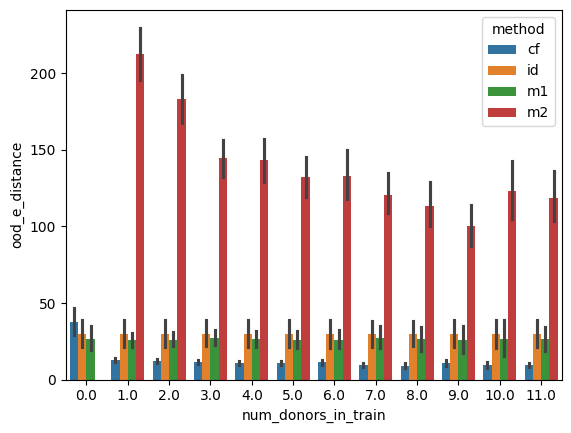

In [12]:
sns.barplot(df, x="num_donors_in_train", y="ood_e_distance", hue="method")

<Axes: xlabel='num_donors_in_train', ylabel='decoded_ood_r_squared'>

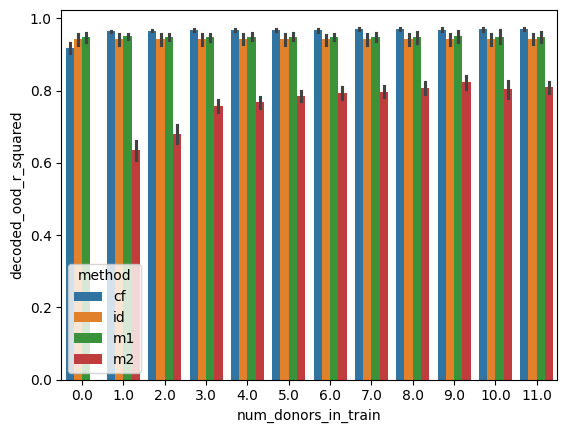

In [14]:
sns.barplot(df, x="num_donors_in_train", y="decoded_ood_r_squared", hue="method")

In [15]:
len(df)

9468